In [57]:
# Helper method used in cells below.
def plot_box(min_lon, min_lat, max_lon, max_lat):
    import matplotlib.pyplot as plt1
    from matplotlib.patches import Polygon
    from mpl_toolkits.basemap import Basemap

    map = Basemap()
    map.bluemarble(scale=0.5)
    poly = Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),(max_lon,min_lat)],facecolor=(0,0,0,0.0),edgecolor='green',linewidth=2)
    plt1.gca().add_patch(poly)
    plt1.gcf().set_size_inches(10,15)
    
    plt1.show()

# Request NEXUS to compute SST Time Sereis 2010/01/01 - 2016/10/30 for the "blob" warming off Western Canada and plot the means

https://oceanxtremes.jpl.nasa.gov/timeSeriesSpark?spark=mesos,16,32&ds=AVHRR_OI_L4_GHRSST_NCEI&minLon=-150&minLat=45&maxLon=-120&maxLat=60&startTime=1262304000&endTime=1477785600


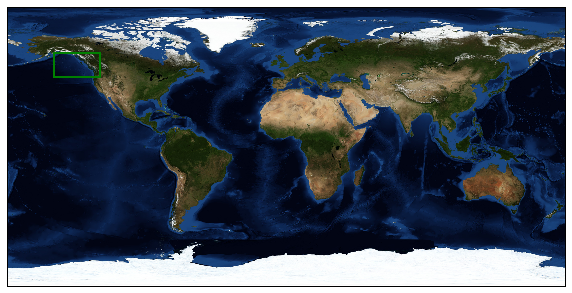

It took: 5.2323503494262695 s


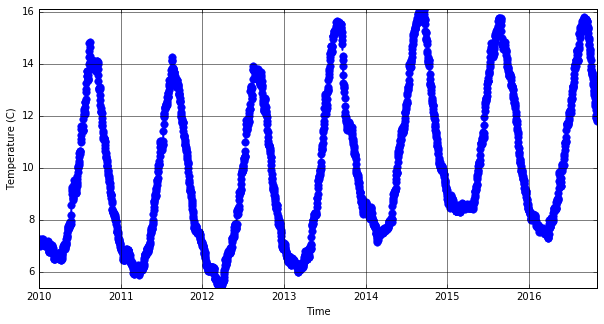

In [59]:
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time

ds='AVHRR_OI_L4_GHRSST_NCEI'
startTime = int(time.mktime(datetime.date(2010,1,1).timetuple()))
endTime = int(time.mktime(datetime.date(2016,10,30).timetuple()))
min_lon, min_lat, max_lon, max_lat = -150, 45, -120, 60
url = 'https://oceanxtremes.jpl.nasa.gov/timeSeriesSpark?spark=mesos,16,32'\
      '&ds={}&minLon={}&minLat={}&maxLon={}&maxLat={}&startTime={}&endTime={}' \
    .format(ds, min_lon, min_lat, max_lon, max_lat, startTime, endTime)
print (url)
plot_box(min_lon, min_lat, max_lon, max_lat)

start = time.time()
# request NEXUS to compute the statis and extract means from
# returned JSON response
response = str(requests.get(url).text)
ts = json.loads(response)
spent = time.time() - start
print ("It took: " + str(spent) + " s")
means = []
dates = []
for data in ts['data']:
    means.append (data[0]['mean'])
    dates.append (datetime.datetime.fromtimestamp((data[0]['time'])))
# plot the extracted means
plt.figure(figsize=(10,5), dpi=100)
lines = plt.plot(dates, means)
plt.setp(lines, color='b', linewidth=2.0, linestyle='--',
         dash_capstyle='round', marker='.', markersize=15.0, mfc='b')
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.xlim(dates[0], dates[-1])
plt.xlabel('Time')
plt.ylim(min(means), max(means))
plt.ylabel ('Temperature (C)')
plt.show()

# Request NEXUS to compute Daily Difference Average 2010/01/01 - 2016/10/30 for El Nino Region

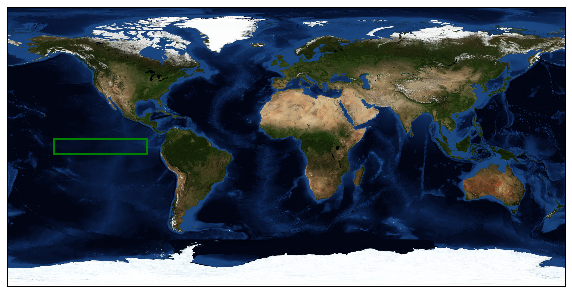

https://oceanxtremes.jpl.nasa.gov/dailydifferenceaverage_spark?dataset=AVHRR_OI_L4_GHRSST_NCEI&climatology=AVHRR_OI_L4_GHRSST_NCEI_CLIM&b=-150,-5,-90,5&startTime=2010-01-01T00:00:00Z&endTime=2016-10-30T00:00:00Z
It took: 38.87535238265991 s


In [56]:
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time

ds='AVHRR_OI_L4_GHRSST_NCEI'
climatology='AVHRR_OI_L4_GHRSST_NCEI_CLIM'
bbox = '-150,-5,-90,5'
date_format = '%Y-%m-%dT%H:%M:%SZ'
startTime = datetime.date(2010,1,1).strftime(date_format)
endTime = datetime.date(2016,10,30).strftime(date_format)
url = 'https://oceanxtremes.jpl.nasa.gov/dailydifferenceaverage_spark?' \
      'dataset={}&climatology={}&b={}&startTime={}&endTime={}' \
    .format(ds, climatology, bbox, startTime, endTime)
    
min_lon, min_lat, max_lon, max_lat = bbox.split(',')
plot_box(min_lon, min_lat, max_lon, max_lat)

print (url)
start = time.time()
# request NEXUS to compute the statis and extract means from
# returned JSON response
response = str(requests.get(url).text)
dda = json.loads(response)
spent = time.time() - start
print ("It took: " + str(spent) + " s")

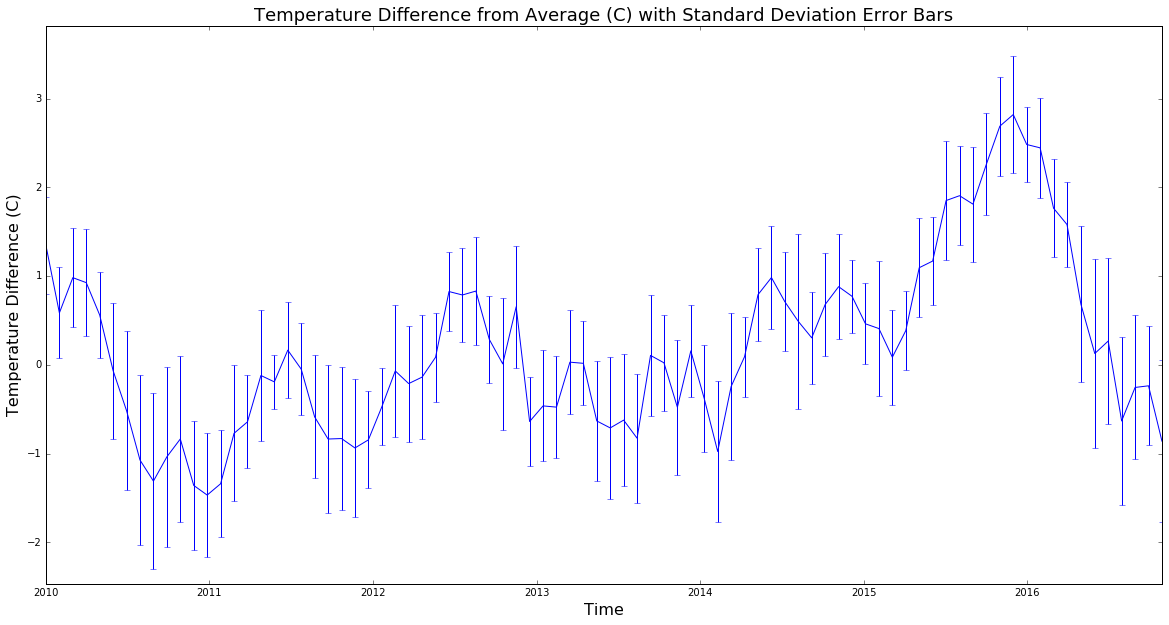

In [66]:
means = []
dates = []
st_ds = []
# Sampling every 30th data point to reduce plot noise
for i, data in enumerate(dda['data']):
    if i % 30 == 0:
        means.append (data[0]['mean'])
        dates.append (datetime.datetime.fromtimestamp((data[0]['time'])))
        st_ds.append (data[0]['std'])
# plot the extracted means
plt.figure(figsize=(20,10), dpi=100)
lines = plt.errorbar(dates, means, st_ds)
plt.xlim(dates[0], dates[-1])
plt.xlabel('Time', fontsize=16)
plt.ylim(min(means)-1, max(means)+1)
plt.ylabel ('Temperature Difference (C)', fontsize=16)
plt.title('Temperature Difference from Average (C) with Standard Deviation Error Bars', fontsize=18)
plt.show()

# Request NEXUS to compute SST Time Sereis 2010/01/01 - 2016/10/30 for the "blob" warming off Western Canada and plot the means

https://ec2-34-205-91-196.compute-1.amazonaws.com/timeSeriesSpark?spark=mesos,16,32&ds=AVHRR_OI_L4_GHRSST_NCEI&minLon=-150&minLat=45&maxLon=-120&maxLat=60&startTime=1262304000&endTime=1477785600


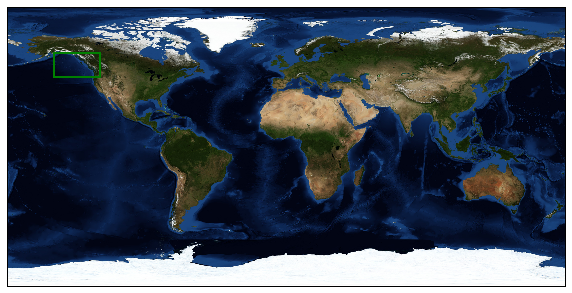

It took: 5.672675848007202 s


/usr/local/anaconda/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


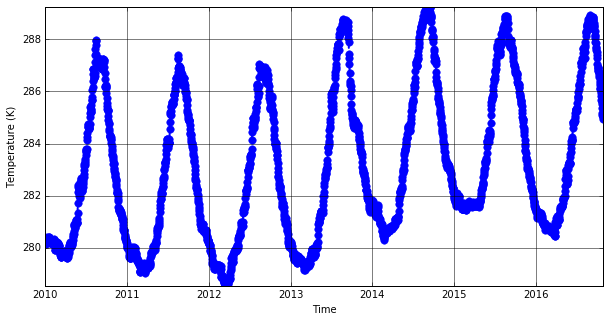

In [60]:
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time

ds='AVHRR_OI_L4_GHRSST_NCEI'
startTime = int(time.mktime(datetime.date(2010,1,1).timetuple()))
endTime = int(time.mktime(datetime.date(2016,10,30).timetuple()))
min_lon, min_lat, max_lon, max_lat = -150, 45, -120, 60
url = 'https://ec2-34-205-91-196.compute-1.amazonaws.com/timeSeriesSpark?spark=mesos,16,32'\
      '&ds={}&minLon={}&minLat={}&maxLon={}&maxLat={}&startTime={}&endTime={}' \
    .format(ds, min_lon, min_lat, max_lon, max_lat, startTime, endTime)
print (url)
plot_box(min_lon, min_lat, max_lon, max_lat)

start = time.time()
# request NEXUS to compute the statis and extract means from
# returned JSON response
response = str(requests.get(url, verify=False).text)
ts = json.loads(response)
spent = time.time() - start
print ("It took: " + str(spent) + " s")
means = []
dates = []
for data in ts['data']:
    means.append (data[0]['mean'])
    dates.append (datetime.datetime.fromtimestamp((data[0]['time'])))
# plot the extracted means
plt.figure(figsize=(10,5), dpi=100)
lines = plt.plot(dates, means)
plt.setp(lines, color='b', linewidth=2.0, linestyle='--',
         dash_capstyle='round', marker='.', markersize=15.0, mfc='b')
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.xlim(dates[0], dates[-1])
plt.xlabel('Time')
plt.ylim(min(means), max(means))
plt.ylabel ('Temperature (K)')
plt.show()

# Request NEXUS to compute Daily Difference Average 2010/01/01 - 2016/10/30 for El Nino

https://ec2-34-205-91-196.compute-1.amazonaws.com/dailydifferenceaverage_spark?dataset=AVHRR_OI_L4_GHRSST_NCEI&climatology=AVHRR_OI_L4_GHRSST_NCEI_CLIM&b=-150,-5,-90,5&startTime=2010-01-01T00:00:00Z&endTime=2016-10-30T00:00:00Z


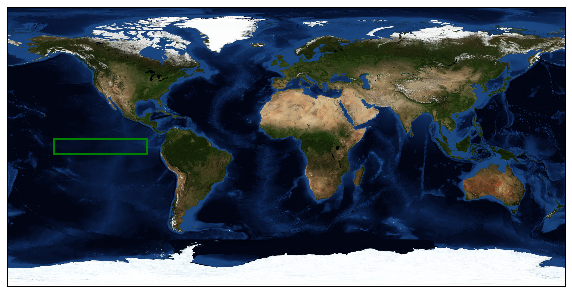

It took: 62.316240549087524 s


/usr/local/anaconda/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [61]:
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time

ds='AVHRR_OI_L4_GHRSST_NCEI'
climatology='AVHRR_OI_L4_GHRSST_NCEI_CLIM'
bbox = '-150,-5,-90,5'
date_format = '%Y-%m-%dT%H:%M:%SZ'
startTime = datetime.date(2010,1,1).strftime(date_format)
endTime = datetime.date(2016,10,30).strftime(date_format)
url = 'https://ec2-34-205-91-196.compute-1.amazonaws.com/dailydifferenceaverage_spark?' \
      'dataset={}&climatology={}&b={}&startTime={}&endTime={}' \
    .format(ds, climatology, bbox, startTime, endTime)
print (url)

min_lon, min_lat, max_lon, max_lat = bbox.split(',')
plot_box(min_lon, min_lat, max_lon, max_lat)

start = time.time()
# request NEXUS to compute the statis and extract means from
# returned JSON response
response = str(requests.get(url, verify=False).text)
dda_amce = json.loads(response)
spent = time.time() - start
print ("It took: " + str(spent) + " s")

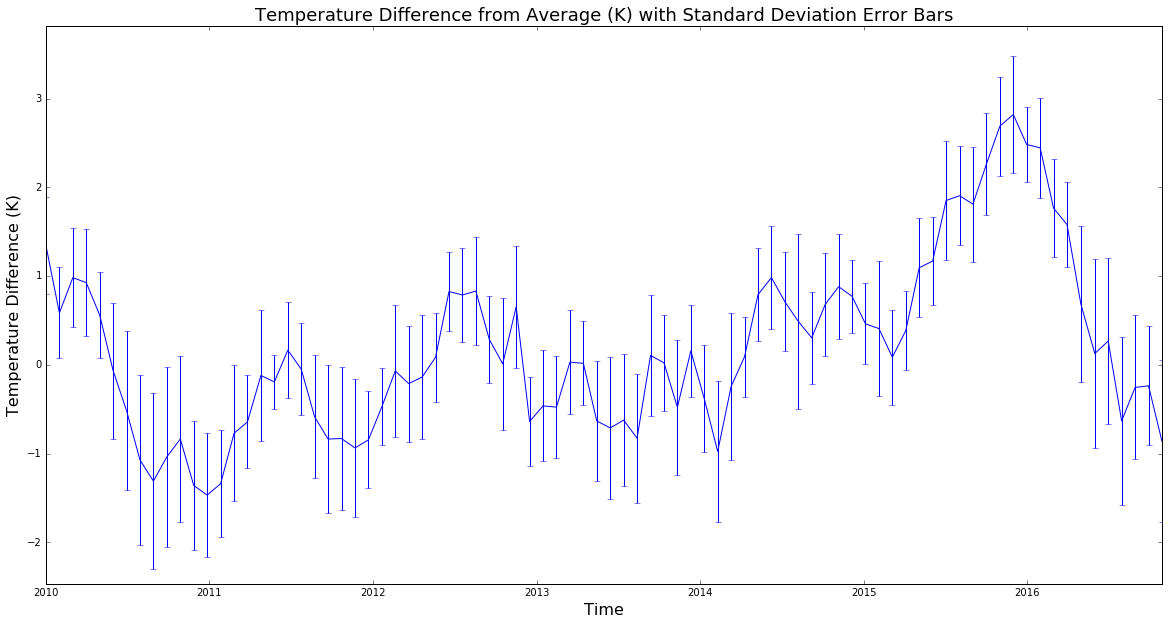

In [65]:
means = []
dates = []
st_ds = []
# Sampling every 30th data point to reduce plot noise
for i, data in enumerate(dda_amce['data']):
    if i % 30 == 0:
        means.append (data[0]['mean'])
        dates.append (datetime.datetime.fromtimestamp((data[0]['time'])))
        st_ds.append (data[0]['std'])
# plot the extracted means
plt.figure(figsize=(20,10), dpi=100)
lines = plt.errorbar(dates, means, st_ds)
plt.xlim(dates[0], dates[-1])
plt.xlabel('Time', fontsize=16)
plt.ylim(min(means)-1, max(means)+1)
plt.ylabel ('Temperature Difference (K)', fontsize=16)
plt.title('Temperature Difference from Average (K) with Standard Deviation Error Bars', fontsize=18)
plt.show()